In [1]:
from utility import *
import re

In [72]:
sino = parse_sinogramm_from_ps('../messungen/Tom2/2020-01-10_13-35/Results/sinogram.ps')

In [73]:
%matplotlib inline


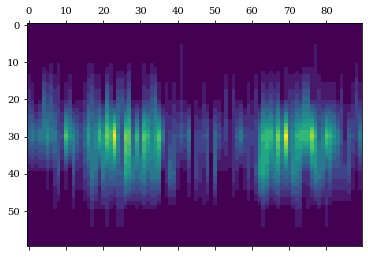

In [74]:
interval = 6
clipped = sino[0::6, 60:120]
# for i in range(1, interval):
#     clipped += sino[i::6, 60:120]
plt.matshow(clipped.T)


In [132]:
center_line = clipped.sum(axis=1)
center_line = center_line

In [133]:
order = 5
param = get_lowest_order_fft(center_line, order)

In [136]:
print(get_coeff_table(param))

\(c_i\) & 0 & 1 & 2 & 3 & 4\\
 &10321+0i & 647.68-220.76i & -2723.6+1336.38i & 23.13-309.09i & 306.73-450.29i


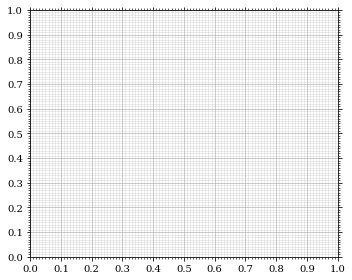

In [135]:

prox = reconstruct_fft(param, center_line.size, np.arange(0, center_line.size))

corr = 1/prox
corr = corr/corr.max()
corrected = center_line*corr
fig, ax = set_up_plot()
degs = np.arange(0, center_line.size) * 2 
save_fig(fig, 'correction_overview', 'tom2')

In [110]:
corrected_sinogram = normalize(clipped*corr[:, None])


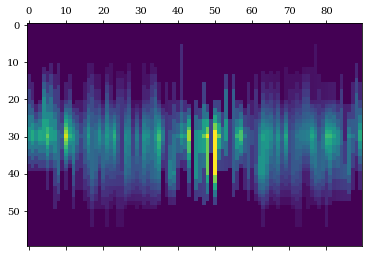

In [111]:
plt.matshow(corrected_sinogram.T)

In [112]:
extended_corr = np.empty(corr.size * 6)
for i in range(0, interval):
    extended_corr[i::6] = corr

In [113]:
corr_full_sinogramm = sino*extended_corr[:, None]

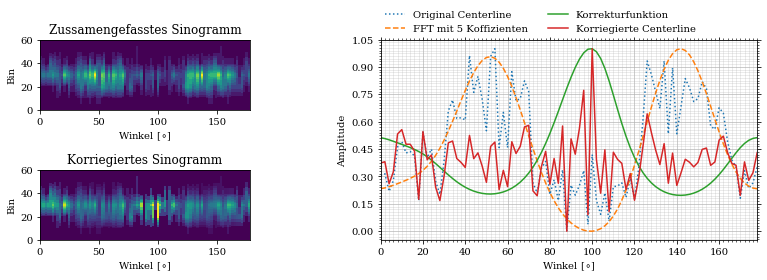

In [131]:
fig = plt.figure()
ax_clip = fig.add_subplot(221)
plot_sinogram(ax_clip, clipped, 'Zussamengefasstes Sinogramm')
ax_corrected_clip = fig.add_subplot(223)
plot_sinogram(ax_corrected_clip, corrected_sinogram, 'Korriegiertes Sinogramm')
_, ax = set_up_plot(fig=fig, subplot=122)

ax.plot(degs, normalize(center_line), label='Original Centerline', linestyle=':')
ax.set_xlim([degs[0], degs[-1]])
ax.set_xlabel('Winkel [$\circ$]')
ax.set_ylabel('Amplitude')

ax.plot(degs, normalize(prox), label=f'FFT mit {order} Koffizienten', linestyle='--')
ax.plot(degs, corr, label='Korrekturfunktion')

ax.plot(degs, normalize(corrected), label='Korriegierte Centerline')
ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2, 
            borderaxespad=0, frameon=False)

save_fig(fig, 'raw_and_corrected', 'tom2', (12, 4))

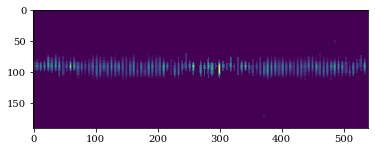

In [104]:
plt.imshow(corr_full_sinogramm.T)

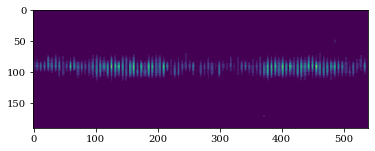

In [105]:
plt.imshow(sino.T)

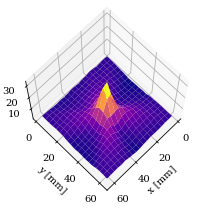

In [147]:

inhom_matrix = load_matrix('../messungen/Tom2/2020-01-10_13-35/Results/Matrix_reco.txt')
fig, ax = plot_reconstruction(inhom_matrix, elev=70, azim=45, save=('3dplot', 'tom2', (3, 3)))